In [1]:
import os
import charts_function_list

In [2]:
base_path, data, outputs = charts_function_list.folder_setup()

In [4]:
os.chdir(data)
dc_ratings = pd.read_csv('dc_movie_ratings.csv')

In [19]:
colors = {'WB Batman':'#1b9e77',
         'Dark Knight Trilogy':'#66a61e',
         'DC Extended Universe':'#d95f02',
         'Superman':'#7570b3',
         'Other':'#636363'}

In [21]:
dc_ratings['color']=dc_ratings['Franchise'].map(colors)

In [33]:
dc_ratings = dc_ratings[['Movie','Franchise','Complex Rank','IMDB rank','RT Rank','Metacritic Rank','color']].set_index(('Movie'))

In [141]:
sorted_titles = dc_ratings.sort_values(by='Complex Rank').reset_index()['Movie'].values

In [39]:
ratings = dc_ratings[['Complex Rank','IMDB rank','RT Rank','Metacritic Rank']].T
colors = dc_ratings[['color']].T
franchises = dc_ratings[['Franchise']].T

In [117]:
ratings.iloc[3,:] = ratings.iloc[3,:]-2

In [154]:
np.append('',sorted_titles)

array(['', 'The Dark Knight', 'Superman II', 'Batman', 'Batman Begins',
       'Batman Returns', 'Superman', 'The Dark Knight Rises',
       'Wonder Woman', 'Batman Forever', 'Man of Steel',
       'Superman Returns', 'Batman vs Superman', 'Batman & Robin',
       'Suicide Squad', 'Supergirl', 'Superman III', 'Steel', 'Catwoman',
       'Green Lantern', 'Superman IV'], dtype=object)

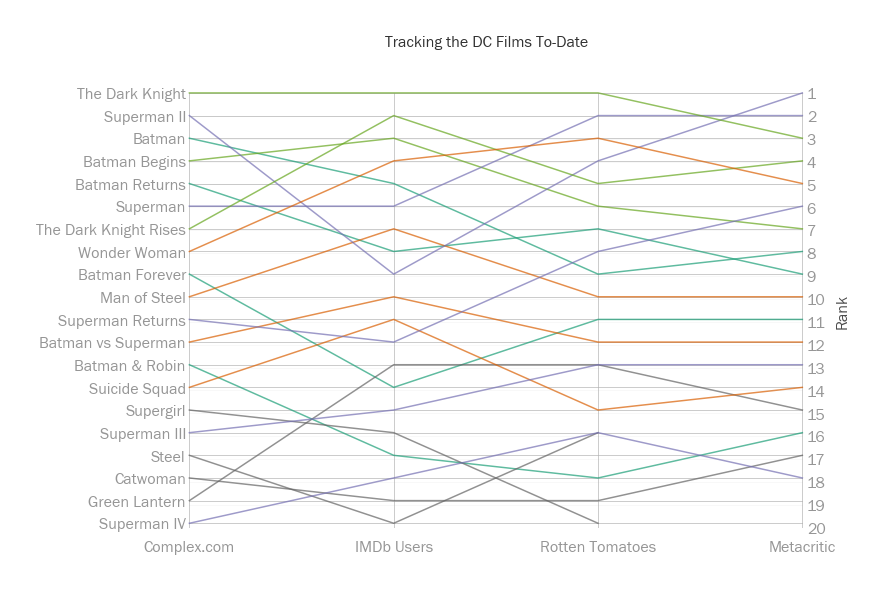

In [180]:
chart = charts_function_list.chart_maker(title='Tracking the DC Films To-Date')
fig = chart.initial_fig_axis(figsize=(11,8))
ax = chart.axes_set_up(fig=fig)
for item in range(20):
    plt.plot([0,.25,.5,.75],ratings.iloc[:,item],color=colors.T.iloc[item,0],label=franchises.T.iloc[item,0],clip_on=False,alpha=.7)
chart.x_axis_setup(ax,0,.751,.25)
chart.y_axis_setup(ax,1,20.2,1)
ax.invert_yaxis()
ax.grid(alpha=.8)
ax.set_xticklabels(['','Complex.com','IMDb Users','Rotten Tomatoes','Metacritic'],position=(.5,-.02))
ax.set_yticklabels(np.append('',sorted_titles))
ax2 = ax.twinx()
chart.y_axis_setup(ax2,1,20,1)
ax2.invert_yaxis()
chart.tick_params_(ax=ax)
chart.tick_params_(ax=ax2,)
ax2.set_ylabel('Rank',fontsize=16,alpha=.7)

plt.show()

In [57]:
chart = charts_function_list.chart_maker()
fig = chart.initial_fig_axis()
ax = chart.axes_set_up()

In [ ]:
fig = chart.initial_fig_axis()
ax = chart.axes_set_up()